In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
!pip install keras-tuner

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras_tuner.tuners import RandomSearch
import numpy as np

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
x_train.shape

(60000, 28, 28)

In [18]:
def build_model(hp):
    model = keras.Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    
    hp_units1 = hp.Int('units1', min_value=32, max_value=512, step=32)
    hp_activ = hp.Choice('activ', ["relu", "sigmoid", "silu"])
    model.add(Dense(units=hp_units1, activation=hp_activ))
    
    hp_units2 = hp.Int('units2', min_value=32, max_value=512, step=32)
    model.add(Dense(units=hp_units2, activation=hp_activ))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[0.01, 0.001, 0.0001])
    
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [22]:
# Initialiser le tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='mnist_tuning',
    project_name='mnist'
)

tuner.search_space_summary()

tuner.search(x_train, y_train, epochs=4, validation_data=(x_test, y_test))

tuner.results_summary()

best_model = tuner.get_best_models(num_models=1)[0]


Trial 10 Complete [00h 01m 01s]
val_accuracy: 0.9625000059604645

Best val_accuracy So Far: 0.9755999743938446
Total elapsed time: 00h 09m 49s
Results summary
Results in mnist_tuning/mnist
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 05 summary
Hyperparameters:
units1: 96
activ: relu
units2: 160
learning_rate: 0.001
Score: 0.9755999743938446

Trial 06 summary
Hyperparameters:
units1: 320
activ: relu
units2: 64
learning_rate: 0.001
Score: 0.9755499958992004

Trial 08 summary
Hyperparameters:
units1: 480
activ: relu
units2: 480
learning_rate: 0.0001
Score: 0.9741500020027161

Trial 07 summary
Hyperparameters:
units1: 256
activ: relu
units2: 416
learning_rate: 0.0001
Score: 0.9711999893188477

Trial 03 summary
Hyperparameters:
units1: 320
activ: sigmoid
units2: 128
learning_rate: 0.01
Score: 0.9677500128746033

Trial 01 summary
Hyperparameters:
units1: 192
activ: sigmoid
units2: 288
learning_rate: 0.01
Score: 0.9663000106811523

Trial 00 summary
Hyperparam

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


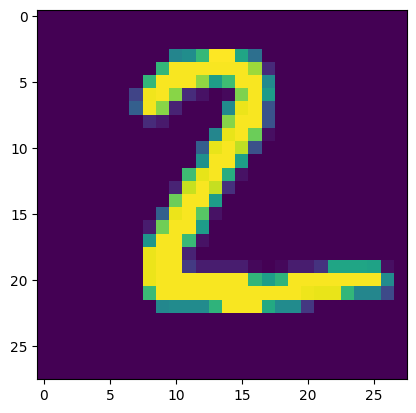

In [46]:
import matplotlib.pyplot as plt
img = x_test[1]
plt.imshow(img)

In [47]:
o = best_model(img.reshape((1, 28, 28)))

In [48]:
tf.math.argmax(o[0])

<tf.Tensor: shape=(), dtype=int64, numpy=2>